In [5]:
import pandas as pd
import numpy as np
ds=pd.read_csv("C:\\Users\\Ameen\\Downloads\\fraudTest.csv",encoding='latin1')
ds = ds.drop(ds.columns[0], axis=1)
ds.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
#DATA CLEANING AND PREPROCESSING
#Convert trans_date_trans_time into separate date, hour, day_of_week fields.

ds['trans_date_trans_time'] = pd.to_datetime(ds['trans_date_trans_time'])
ds['transaction_date'] = ds['trans_date_trans_time'].dt.date
ds['transaction_hour'] = ds['trans_date_trans_time'].dt.hour
ds['transaction_day_of_week'] = ds['trans_date_trans_time'].dt.dayofweek
ds.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_date,transaction_hour,transaction_day_of_week
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12,6
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12,6
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12,6
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12,6
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12,6


In [9]:
#Encode categorical variables.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ds['merchant_encoded'] = encoder.fit_transform(ds['merchant'])
ds['category_encoded'] = encoder.fit_transform(ds['category'])
ds['gender_encoded'] = encoder.fit_transform(ds['gender'])
ds['city_encoded'] = encoder.fit_transform(ds['city'])
ds['state_encoded'] = encoder.fit_transform(ds['state'])
ds['job_encoded'] = encoder.fit_transform(ds['job'])
ds.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,is_fraud,transaction_date,transaction_hour,transaction_day_of_week,merchant_encoded,category_encoded,gender_encoded,city_encoded,state_encoded,job_encoded
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,0,2020-06-21,12,6,319,10,1,157,39,275
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,0,2020-06-21,12,6,591,10,0,16,43,392
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,0,2020-06-21,12,6,611,5,0,61,33,259
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,0,2020-06-21,12,6,222,9,1,764,8,407
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,0,2020-06-21,12,6,292,13,1,247,21,196


In [11]:
#Handle missing or null values.
ds.isnull().sum()  

trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
transaction_date           0
transaction_hour           0
transaction_day_of_week    0
merchant_encoded           0
category_encoded           0
gender_encoded             0
city_encoded               0
state_encoded              0
job_encoded                0
dtype: int64

In [13]:
ds.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day_of_week,merchant_encoded,category_encoded,gender_encoded,city_encoded,state_encoded,job_encoded
count,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,2020-10-02 01:54:25.166780672,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860,12.809062,2.726779,343.086430,6.237059,0.451367,422.283741,25.771627,241.755040
min,2020-06-21 12:14:25,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-08-09 06:10:27.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000,7.000000,1.000000,166.000000,3.000000,0.000000,212.000000,14.000000,124.000000
50%,2020-10-03 00:59:48,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000,14.000000,2.000000,346.000000,6.000000,0.000000,420.000000,26.000000,239.000000
75%,2020-12-01 03:03:04,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000,19.000000,5.000000,515.000000,10.000000,1.000000,637.000000,37.000000,362.000000
max,2020-12-31 23:59:34,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000,23.000000,6.000000,692.000000,13.000000,1.000000,848.000000,49.000000,477.000000
std,NaN,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008,6.810924,2.178681,201.284993,3.912874,0.497630,244.812950,14.116718,136.327924


In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    555719 non-null  datetime64[ns]
 1   cc_num                   555719 non-null  int64         
 2   merchant                 555719 non-null  object        
 3   category                 555719 non-null  object        
 4   amt                      555719 non-null  float64       
 5   first                    555719 non-null  object        
 6   last                     555719 non-null  object        
 7   gender                   555719 non-null  object        
 8   street                   555719 non-null  object        
 9   city                     555719 non-null  object        
 10  state                    555719 non-null  object        
 11  zip                      555719 non-null  int64         
 12  lat             

In [17]:
#Drop or anonymize personal identifiers
ds = ds.drop(['cc_num', 'first', 'last', 'street', 'zip','trans_num','unix_time','trans_date_trans_time'], axis=1)
ds.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,...,is_fraud,transaction_date,transaction_hour,transaction_day_of_week,merchant_encoded,category_encoded,gender_encoded,city_encoded,state_encoded,job_encoded
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,...,0,2020-06-21,12,6,319,10,1,157,39,275
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",...,0,2020-06-21,12,6,591,10,0,16,43,392
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",...,0,2020-06-21,12,6,611,5,0,61,33,259
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,...,0,2020-06-21,12,6,222,9,1,764,8,407
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,...,0,2020-06-21,12,6,292,13,1,247,21,196


In [19]:
#EXPLORATORY DATA ANALYSIS (EDA)
#Distribution of transaction amount for fraud vs non-fraud.
fraud = ds[ds['is_fraud'] == 1]
non_fraud = ds[ds['is_fraud'] == 0] 
fraud_count=fraud.shape[0]
print("Number of frauds:",fraud_count)
non_fraud_count=non_fraud.shape[0]
print("Number of non_frauds:",non_fraud_count)

Number of frauds: 2145
Number of non_frauds: 553574


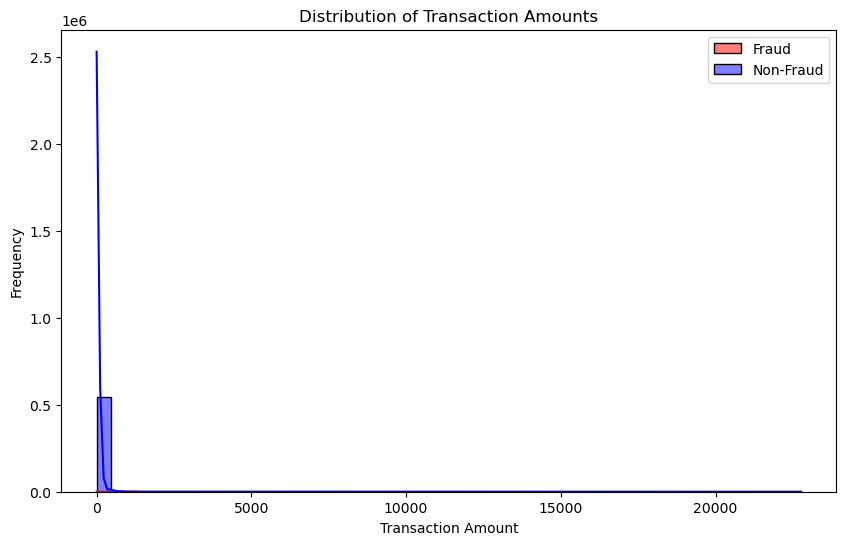

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(fraud['amt'], color='red', kde=True, label='Fraud', bins=50)
sns.histplot(non_fraud['amt'], color='blue', kde=True, label='Non-Fraud', bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [23]:
#Most common category and state for fraud cases.
fraud_cases = ds[ds['is_fraud'] == 1]
most_common_category = fraud_cases['category'].value_counts().idxmax()
category_count = fraud_cases['category'].value_counts().max()
print("Most Common Category:", most_common_category, "with", category_count, "fraudulent transactions")
most_common_state = fraud_cases['state'].value_counts().idxmax()
state_count = fraud_cases['state'].value_counts().max()
print("Most Common State:", most_common_state, "with", state_count, "fraudulent transactions")

Most Common Category: shopping_net with 506 fraudulent transactions
Most Common State: NY with 175 fraudulent transactions


In [25]:
#Average fraud rate by job, gender, and hour of day.
fraud_rate_by_job= ds.groupby(['job'])['is_fraud'].mean()
fraud_rate_job = fraud_rate_by_job.reset_index()
fraud_rate_job.columns = ['Job', 'Average Fraud Rate']
fraud_rate_job.head()

,Job,Average Fraud Rate
0,Academic librarian,0.0000
1,"Accountant, chartered certified",0.0553
2,"Accountant, chartered public finance",0.0000
3,Accounting technician,0.0000
4,Acupuncturist,0.0000


In [27]:
fraud_rate_by_gender= ds.groupby(['gender'])['is_fraud'].mean()
fraud_rate_gender = fraud_rate_by_gender.reset_index()
fraud_rate_gender.columns = ['gender', 'Average Fraud Rate']
fraud_rate_gender.head()

,gender,Average Fraud Rate
0,F,0.003818
1,M,0.003911


In [29]:
fraud_rate_by_hour= ds.groupby(['transaction_hour'])['is_fraud'].mean()
fraud_rate_hour = fraud_rate_by_hour.reset_index()
fraud_rate_hour.columns = ['hours', 'Average Fraud Rate']
fraud_rate_hour.head()

,hours,Average Fraud Rate
0,0,0.010356
1,1,0.009154
2,2,0.009261
3,3,0.010660
4,4,0.000830


In [31]:
!pip install folium
!pip install plotly
#Map merchant locations and overlay fraud hotspots using merch_lat, merch_long.
import folium
map_merchant = folium.Map(location=[ds['merch_lat'].mean(), ds['merch_long'].mean()], zoom_start=6)
for index, row in fraud.iterrows():
    folium.CircleMarker(
        location=[row['merch_lat'], row['merch_long']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
    ).add_to(map_merchant)
display(map_merchant)

In [33]:
#FEATURE ENGINEERING

#Create new features:
#transaction_hour, is_night_transaction, age from dob.
ds['is_night_transaction'] = ds['transaction_hour'].apply(lambda x: 1 if x >= 22 or x < 6 else 0)
ds['dob'] = pd.to_datetime(ds['dob'])
ds['age'] = (pd.Timestamp.now() - ds['dob']).dt.days // 365  
ds

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,...,transaction_hour,transaction_day_of_week,merchant_encoded,category_encoded,gender_encoded,city_encoded,state_encoded,job_encoded,is_night_transaction,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,...,12,6,319,10,1,157,39,275,0,57
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",...,12,6,591,10,0,16,43,392,0,35
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",...,12,6,611,5,0,61,33,259,0,54
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,...,12,6,222,9,1,764,8,407,0,37
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,...,12,6,292,13,1,247,21,196,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,519,Town planner,...,23,3,507,5,1,443,23,460,1,59
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,Futures trader,...,23,3,264,7,1,401,42,198,1,25
555716,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,Musician,...,23,3,496,7,0,104,46,294,1,43
555717,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,44.6255,-116.4493,129,Cartographer,...,23,3,75,13,1,476,12,58,1,59


In [35]:
#distance_to_merchant using haversine formula.

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371
    return radius * c

ds['distance_to_merchant'] = haversine(ds['lat'], ds['long'], ds['merch_lat'], ds['merch_long'])
ds.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,...,transaction_day_of_week,merchant_encoded,category_encoded,gender_encoded,city_encoded,state_encoded,job_encoded,is_night_transaction,age,distance_to_merchant
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,...,6,319,10,1,157,39,275,0,57,24.561462
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",...,6,591,10,0,16,43,392,0,35,104.925092
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",...,6,611,5,0,61,33,259,0,54,59.080078
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,...,6,222,9,1,764,8,407,0,37,27.698567
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,...,6,292,13,1,247,21,196,0,69,104.335106


In [37]:
#amt_log: Log transformation of amt.
ds['amt_log'] = np.log1p(ds['amt'])  
ds.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,...,merchant_encoded,category_encoded,gender_encoded,city_encoded,state_encoded,job_encoded,is_night_transaction,age,distance_to_merchant,amt_log
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,...,319,10,1,157,39,275,0,57,24.561462,1.350667
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",...,591,10,0,16,43,392,0,35,104.925092,3.428813
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",...,611,5,0,61,33,259,0,54,59.080078,3.744314
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,...,222,9,1,764,8,407,0,37,27.698567,4.111693
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,...,292,13,1,247,21,196,0,69,104.335106,1.432701


In [39]:
#Bin amt into ranges for grouped analysis
bins = [0, 50, 100, 500, 1000, 5000, float('inf')]  
bin_labels = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '5000+']
ds['amt_bin'] = pd.cut(ds['amt'], bins=bins, labels=bin_labels)
print(ds[['amt', 'amt_bin']].head())

     amt amt_bin
0   2.86    0-50
1  29.84    0-50
2  41.28    0-50
3  60.05  50-100
4   3.19    0-50


In [41]:
#MODEL BUILDING

#Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X = ds.drop('is_fraud', axis=1)  
y = ds['is_fraud']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clean=X_train.drop(['merchant','category','gender','city','state','job','amt_bin'],axis=1)
X_test_clean=X_test.drop(['merchant','category','gender','city','state','job','amt_bin'],axis=1)
X_train_clean['transaction_date']=pd.to_datetime(X_train_clean['transaction_date'])
X_train_clean['transaction_date']=X_train_clean['transaction_date'].astype('int64')
X_train_clean['dob']=X_train_clean['dob'].astype('int64')
X_test_clean['transaction_date']=pd.to_datetime(X_test_clean['transaction_date'])
X_test_clean['transaction_date']=X_test_clean['transaction_date'].astype('int64')
X_test_clean['dob']=X_test_clean['dob'].astype('int64')
print(X_train_clean.dtypes)

amt                        float64
lat                        float64
long                       float64
city_pop                     int64
dob                          int64
merch_lat                  float64
merch_long                 float64
transaction_date             int64
transaction_hour             int32
transaction_day_of_week      int32
merchant_encoded             int32
category_encoded             int32
gender_encoded               int32
city_encoded                 int32
state_encoded                int32
job_encoded                  int32
is_night_transaction         int64
age                          int64
distance_to_merchant       float64
amt_log                    float64
dtype: object


In [43]:
#Train binary classification models:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clean, y_train)
y_pred_lr = log_reg.predict(X_test_clean)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9961671345281796
Confusion Matrix:
 [[110718      0]
 [   426      0]]


In [50]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_clean, y_train)
y_pred_rf = random_forest.predict(X_test_clean)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9986414021449651
Confusion Matrix:
 [[110706     12]
 [   139    287]]


In [51]:
#XGBoost
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_clean, y_train)
y_pred_xgb = xgb.predict(X_test_clean)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.6/150.0 MB 16.9 MB/s eta 0:00:09
   - -------------------------------------- 5.8/150.0 MB 16.0 MB/s eta 0:00:10
   -- ------------------------------------- 8.4/150.0 MB 14.5 MB/s eta 0:00:10
   -- ------------------------------------- 10.0/150.0 MB 13.2 MB/s eta 0:00:11
   --- ------------------------------------ 12.1/150.0 MB 12.2 MB/s eta 0:00:12
   --- ------------------------------------ 13.6/150.0 MB 11.4 MB/s eta 0:00:12
   --- ------------------------------------ 14.9/150.0 MB 10.7 MB/s eta 0:00:13
   ---- ----------------------------------- 16.5/150.0 MB 10.3 MB/s eta 0:00:13
   ---- ----------------------------------- 18.1/150.0 MB 10.0 MB/s eta 0:00:14
   ----- ---------------------------------- 19.7/150.0 MB 9.8 MB/s eta 0:00:14
   ----- ---------------------------------- 21.2/150.0 MB 9.4 MB/s eta 0:00:14
   ------ --------------------------------- 22.8/150.0

C:\Users\Ameen\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:05:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9990192902900742
Confusion Matrix:
 [[110685     33]
 [    76    350]]


In [54]:
#MODEL TESTING AND EVALUATION

#Performance Metrics: Evaluate model performance.
from sklearn.metrics import classification_report

print("Report",classification_report(y_test, y_pred_lr))
print("Accuracy of linear regression:",accuracy_score(y_test,y_pred_lr))

Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Accuracy of linear regression: 0.9961671345281796


C:\Users\Ameen\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ameen\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ameen\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
print("Report",classification_report(y_test, y_pred_rf))
print("Accuracy of Random forest:",accuracy_score(y_test,y_pred_rf))

Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.96      0.67      0.79       426

    accuracy                           1.00    111144
   macro avg       0.98      0.84      0.90    111144
weighted avg       1.00      1.00      1.00    111144

Accuracy of Random forest: 0.9986414021449651


In [58]:
print("Report",classification_report(y_test, y_pred_xgb))
print("Accuracy of xgboost:",accuracy_score(y_test,y_pred_xgb))

Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.91      0.82      0.87       426

    accuracy                           1.00    111144
   macro avg       0.96      0.91      0.93    111144
weighted avg       1.00      1.00      1.00    111144

Accuracy of xgboost: 0.9990192902900742


In [70]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(log_reg, X_test_clean, y_test, cv=5, scoring='accuracy')  # `cv=5` means 5 folds
print("Cross-Validation Accuracy Scores:", scores_lr)
print("Mean Accuracy:", scores_lr.mean())

Cross-Validation Accuracy Scores: [0.99617617 0.99617617 0.99617617 0.99613118 0.99617599]
Mean Accuracy: 0.9961671346078926


In [73]:
scores_rf = cross_val_score(random_forest, X_test_clean, y_test, cv=5, scoring='accuracy')  # `cv=5` means 5 folds
print("Cross-Validation Accuracy Scores:", scores_rf)
print("Mean Accuracy:", scores_rf.mean())

Cross-Validation Accuracy Scores: [0.99793063 0.99806559 0.99775069 0.99815556 0.99815548]
Mean Accuracy: 0.9980115898644076


In [75]:
scores_xg = cross_val_score(xgb, X_test_clean, y_test, cv=5, scoring='accuracy')  # `cv=5` means 5 folds
print("Cross-Validation Accuracy Scores:", scores_xg)
print("Mean Accuracy:", scores_xg.mean())

C:\Users\Ameen\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Ameen\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Ameen\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Ameen\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

Cross-Validation Accuracy Scores: [0.99829052 0.99806559 0.99824554 0.99865041 0.99869534]
Mean Accuracy: 0.9983894794668157


In [92]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train_clean=X_train.drop(['merchant','category','gender','city','state','job','amt_bin'],axis=1)
X_test_clean=X_test.drop(['merchant','category','gender','city','state','job','amt_bin'],axis=1)
X_train_clean['transaction_date']=pd.to_datetime(X_train_clean['transaction_date'])
X_train_clean['transaction_date']=X_train_clean['transaction_date'].astype('int64')
X_train_clean['dob']=X_train_clean['dob'].astype('int64')
X_test_clean['transaction_date']=pd.to_datetime(X_test_clean['transaction_date'])
X_test_clean['transaction_date']=X_test_clean['transaction_date'].astype('int64')
X_test_clean['dob']=X_test_clean['dob'].astype('int64')

log_reg.fit(X_train_clean, y_train)
random_forest.fit(X_train_clean, y_train)
xgb.fit(X_train_clean, y_train)
print("Fold Accuracy lr:", log_reg.score(X_test_clean, y_test))
print("Fold Accuracy rf:", random_forest.score(X_test_clean, y_test))
print("Fold Accuracy xg:", xgb.score(X_test_clean, y_test))

Fold Accuracy lr: 0.9961401077890646
Fold Accuracy rf: 0.9961940922955111


C:\Users\Ameen\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold Accuracy xg: 0.9972287953357386


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_clean, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

In [ ]:
param_grid_xg = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid_xg, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train_clean, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization solvers
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train_clean, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

All the three models shows high accuracy of 99%, by compairing all other metrics shown in report(precision,f1 score,recall,cross validation accuracy, fold accuracy and from parameter tuning and calculated score) output above, among all three models logistic regression,random forest,xgboost,-xgboost shows better traits .
for predicting the values can choose the best model as xgboost model.